# Drawing Conclusions Quiz
Use the space below to explore `store_data.csv` to answer the quiz questions below.

In [44]:
# imports and load data
import pandas as pd
% matplotlib inline

df_stores=pd.read_csv('store_data.csv')
df_stores.info()
df_stores.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [45]:
# total sales for the last month
df_stores['week']=pd.to_datetime(df_stores.week)
df_month=df_stores.week.dt.month
df_stores.loc[df_month==12,'storeA'].sum()

115686

In [46]:
df_stores.loc[df_month==12,'storeB'].sum()

97272

In [47]:
df_stores.loc[df_month==12,'storeC'].sum()

90668

In [48]:
df_stores.loc[df_month==12,'storeD'].sum()

87897

In [49]:
df_stores.loc[df_month==12,'storeE'].sum()

37272

    storeA   storeB  storeC  storeD  storeE
0  1057410  1254070  897753  998384  478733
1   115686    97272   90668   87897   37272


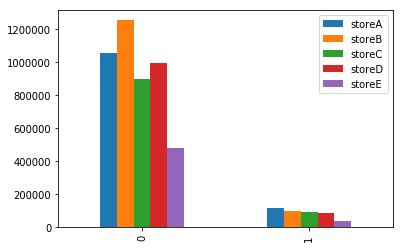

In [67]:
df_stores['week']=pd.to_datetime(df_stores.week)
df_month=df_stores.week.dt.month

df_high=df_stores.groupby([df_month==12],as_index=False)['storeA','storeB','storeC','storeD','storeE'].sum()
print(df_high)
df_high.plot(kind='bar');


In [51]:
# average sales
df_stores.describe()

,storeA,storeB,storeC,storeD,storeE
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5865.480000,6756.710000,4942.105000,5431.405000,2580.025000
std,2958.230318,3601.339489,1325.407768,1183.111323,1725.651381
min,137.000000,14.000000,927.000000,2276.000000,39.000000
25%,3812.250000,3884.500000,4053.500000,4717.000000,1235.000000
50%,5713.500000,6771.000000,4962.500000,5382.000000,2522.000000
75%,7662.250000,9350.500000,5801.750000,6243.750000,3574.250000
max,14403.000000,15841.000000,8293.000000,8190.000000,7553.000000


In [52]:
# sales on march 13, 2016
df_stores.loc[df_stores['week']=='2016-03-13','storeA']


97    2054
Name: storeA, dtype: int64

In [53]:
df_stores.loc[df_stores['week']=='2016-03-13','storeB']

97    1390
Name: storeB, dtype: int64

In [41]:
df_stores.loc[df_stores['week']=='2016-03-13','storeC']

97    5112
Name: storeC, dtype: int64

In [42]:
df_stores.loc[df_stores['week']=='2016-03-13','storeD']

97    5513
Name: storeD, dtype: int64

In [43]:
df_stores.loc[df_stores['week']=='2016-03-13','storeE']

97    2536
Name: storeE, dtype: int64

In [44]:
# worst week for store C
df_stores['storeC'].min()
df_stores.loc[df_stores['storeC']==927,'week']

9   2014-07-06
Name: week, dtype: datetime64[ns]

In [24]:
# total sales during most recent 3 month period
df_recent = df_stores.set_index('week').last('3M')
print(df_recent)

            storeA  storeB  storeC  storeD  storeE
week                                              
2017-12-03    5179    3850    6121    6778     113
2017-12-10    9348    5624    5446    5448     227
2017-12-17    5310    8647    5680    7049    3578
2017-12-24    8976    9503    6240    3882    2890
2017-12-31   11875    1527    6711    5265    1701
2018-01-07    8978   11312    4158    5019    3842
2018-01-14    6963    4014    4215    7153    3097
2018-01-21    5553    3971    3761    6255    3071
2018-01-28     282    6351    7759    5558    1028
2018-02-04    4853    6503    4187    5956    1458
2018-02-11    9202    3677    4540    6186     243
2018-02-18    3512    7511    4151    5596    3501
2018-02-25    7560    6904    3569    5045    2585


In [25]:
df_recent['storeA'].sum()

87591

In [26]:
df_recent['storeB'].sum()

79394

In [27]:
df_recent['storeC'].sum()

66538

In [28]:
df_recent['storeD'].sum()

75190

In [29]:
df_recent['storeE'].sum()

27334

In [68]:
recent=df_stores.groupby([df_recent])['storeA','storeB','storeC','storeD','storeE'].sum()
print(recent)

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional